In [ ]:
#Import libraries/dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the file

In [ ]:
contacts_file = ("contacts.tsv")
contacts = pd.read_csv(contacts_file, sep="\t")

searches_file = ("searches.tsv")
searches = pd.read_csv(searches_file, sep="\t")

Finding out number of nulls values in the dataset

In [ ]:
print('Contacts')
print(contacts.isna().sum()/len(contacts), '\n')
print('Searches')
print(searches.isna().sum()/len(searches))

Contacts
id_guest          0.000000
id_host           0.000000
id_listing        0.000000
ts_contact_at     0.000000
ts_reply_at       0.077208
ts_accepted_at    0.536367
ts_booking_at     0.722101
ds_checkin        0.000000
ds_checkout       0.000000
n_guests          0.000000
n_messages        0.000000
dtype: float64 

Searches
ds                      0.000000
id_user                 0.000000
ds_checkin              0.331561
ds_checkout             0.331561
n_searches              0.000000
n_nights                0.331561
n_guests_min            0.000000
n_guests_max            0.000000
origin_country          0.000000
filter_price_min        0.627221
filter_price_max        0.627221
filter_room_types       0.546940
filter_neighborhoods    0.962336
dtype: float64


OBSERVATIONS:

- The neighborhood column in searches has 96.2336% of null values.
- This could lead to inaccurate assumptions about the demand from people.
- looking through the column, 'City Centre' was a common choice, so this should be investigated further with more data.

## Contacts Dataset

Converting to Datetime

In [ ]:
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True)

contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']



Understanding the dataset

In [ ]:

display(contacts.dtypes)
display(contacts.describe())

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

,n_guests,n_messages,length_stay
count,7823.000000,7823.000000,7823
mean,2.422600,6.319954,5 days 19:25:32.864629937
std,1.617347,6.472827,14 days 23:45:24.447710564
min,1.000000,1.000000,1 days 00:00:00
25%,1.000000,2.000000,2 days 00:00:00
50%,2.000000,4.000000,3 days 00:00:00
75%,3.000000,8.000000,5 days 00:00:00
max,16.000000,102.000000,334 days 00:00:00


Calculate Skewness

In [ ]:
display(contacts.skew(axis = 0, numeric_only = True, skipna = True))

n_guests      2.441468
n_messages    3.696440
accepted      0.145883
dtype: float64

All columns have a significant positive skewness except accepted- which could be attributed to the fact. that it was derived from an existing column.

In [ ]:
from scipy.stats import boxcox


In [ ]:
n_guests_shifted = contacts['n_guests'] + 1 - contacts['n_guests'].min()
contacts['n_guests_transformed'], best_lambda_guests = boxcox(n_guests_shifted)

# Transform 'n_messages'
n_messages_shifted = contacts['n_messages'] + 1 - contacts['n_messages'].min()
contacts['n_messages_transformed'], best_lambda_messages = boxcox(n_messages_shifted)

In [ ]:
display(contacts.describe())

,n_guests,n_messages,length_stay,n_guests_transformed,n_messages_transformed
count,7823.000000,7823.000000,7823,7823.000000,7823.000000
mean,2.422600,6.319954,5 days 19:25:32.864629937,0.601994,1.222845
std,1.617347,6.472827,14 days 23:45:24.447710564,0.436982,0.547209
min,1.000000,1.000000,1 days 00:00:00,0.000000,0.000000
25%,1.000000,2.000000,2 days 00:00:00,0.000000,0.640958
50%,2.000000,4.000000,3 days 00:00:00,0.621879,1.187881
75%,3.000000,8.000000,5 days 00:00:00,0.926787,1.654566
max,16.000000,102.000000,334 days 00:00:00,1.840475,2.853170


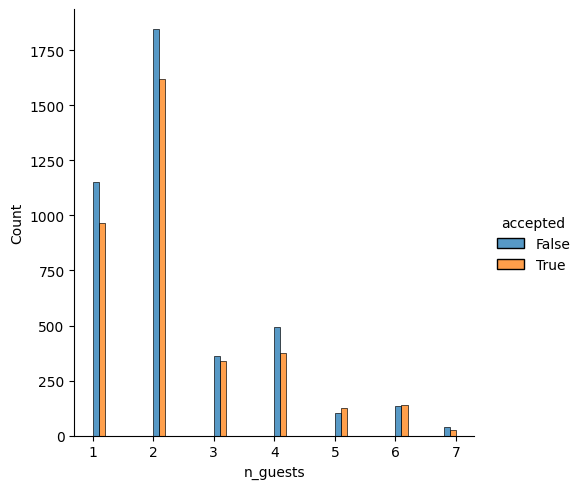

In [ ]:
#Number of guests stayed
contacts_less8 = contacts[contacts['n_guests'] < 8]
sns.displot(contacts_less8, x = 'n_guests', hue = 'accepted', multiple="dodge")
plt.show()

In [ ]:
#Conversion rate from accepting to booking
contacts['ts_booking_at'].count()/contacts['ts_accepted_at'].count()

0.5993934381031155

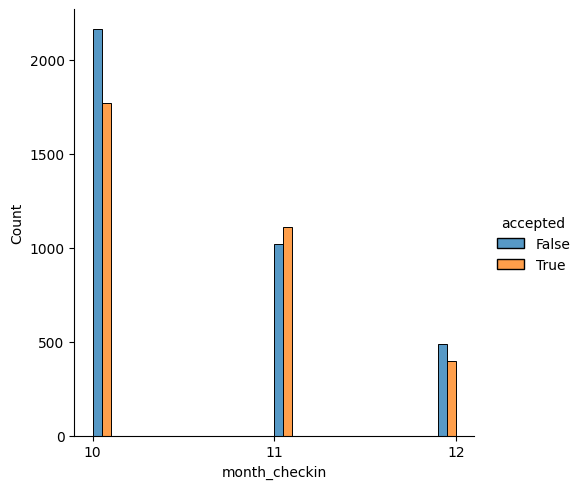

In [ ]:
contacts['month_checkin'] = contacts['ds_checkin'].dt.month #Extract month from checkin date
contacts_checkin = contacts[contacts['month_checkin'] > 9] #Use only peak season months (Oct, Nov, Dec)

#Distribution of checkin among October, November, and December and split by acceptance
sns.displot(contacts_checkin, x='month_checkin', hue = 'accepted', multiple="dodge")
plt.xticks([10, 11, 12])
plt.show()

## Searches Dataset

In [ ]:
searches = searches.drop(columns=['filter_neighborhoods'])

In [ ]:
#Convert date column to datetime data type for easier analysis
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

#How soon they want the room( the time between their search and the day they want to check in )
searches['length_preperation'] = searches['ds_checkin'] - searches['ds']

In [ ]:
#Describe searches dataset
display(searches.describe())

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preperation
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00


OBSERVATION:
- This shows that the number of guests is usually 1 or 2.
- This can be understood since even at 75% the n_guests_min and n_guests_max are 2 and at 25% is 1.
- Leads to the assumption that smaller accommodations are preferred

In [ ]:
display(searches.skew(axis = 0, numeric_only = True, skipna = True))

n_searches           7.509258
n_nights             9.942364
n_guests_min         3.583798
n_guests_max         3.148548
filter_price_min    11.087745
filter_price_max     2.999833
dtype: float64

All numeric columns have a Fisher-Pearson coefficient value greater than 1. This results in a positive skewness.

In [ ]:
searches['log_n_searches'] = np.log1p(searches['n_searches'])
searches['log_n_nights'] = np.log1p(searches['n_nights'])
searches['log_n_guests_min'] = np.log1p(searches['n_guests_min'])
searches['log_n_guests_max'] = np.log1p(searches['n_guests_max'])
searches['log_filter_price_min'] = np.log1p(searches['filter_price_min'])
searches['log_filter_price_max'] = np.log1p(searches['filter_price_max'])

#Distributions

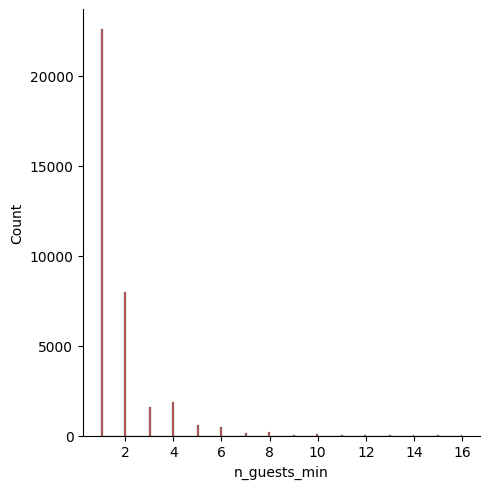

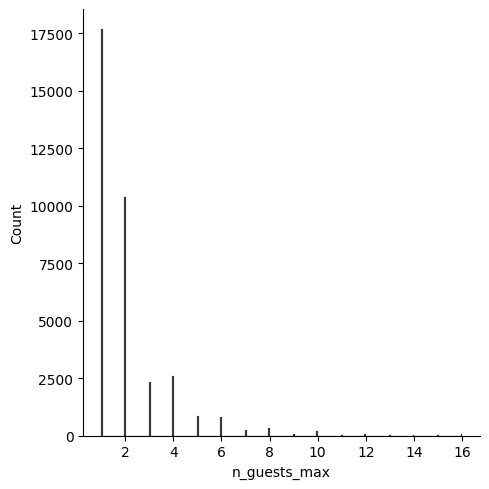

In [ ]:
sns.displot(searches, x = 'n_guests_min', color = 'brown')
sns.displot(searches, x = 'n_guests_max', color = 'black')
plt.show()


**OBSERVATION:**
- Similar distributions with 1 being the most popular option and 2 being the next popular option.

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

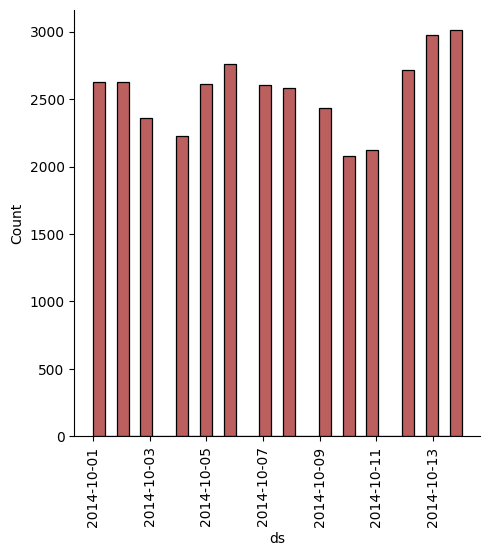

In [ ]:
#When were searches conducted

ax = sns.displot(searches, x = 'ds', color = 'brown')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

OBSERVATION:
- Noticed all date searches were between October 1st to October 14th. No major variation in when search was conducted between these dates

In [ ]:
#Percentage of dataset with a filter_price_max above 600

print(len(searches[searches['filter_price_max'] > 600])/len(searches['filter_price_max'])*100, '%')

5.311022189887232 %


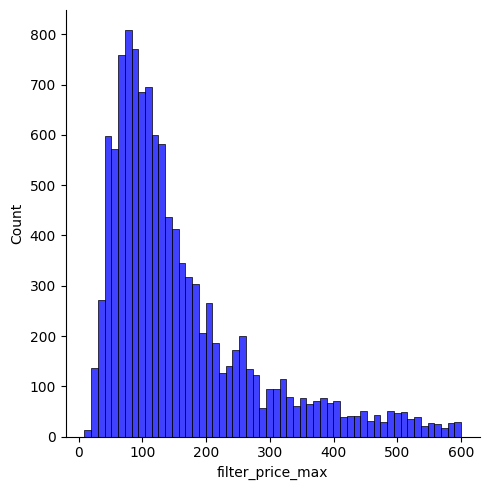

In [ ]:
#Distribution of filter_price_max of searches

#Removing the set upper limit
searches_maxprice_removed = searches[searches['filter_price_max'] <= 600]

#Distribution plot of filter_price_max column
sns.displot(x=searches_maxprice_removed["filter_price_max"], color = 'blue')
plt.show()

- Filter_price_max was chosen instead of filter_price_min due to the min usually being set at $0

- To further help better visualize the trend we set the filter price max as less or equal to 600. 600 was chosen as the limit since only 14.25% of the dataset has values greater than 600

9.396423874415872 % 



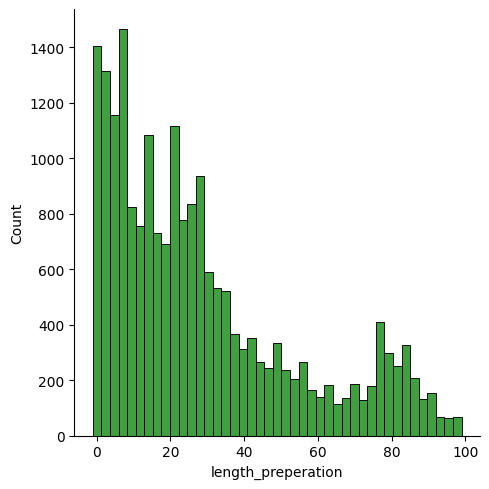

In [ ]:
#Distribution of length_preperation of searches

#Percentage of dataset beyond 100 days
distribution = searches["length_preperation"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100])/len(distribution)*100, '% \n')

#Remove values beyond 100 days
distribution = distribution[distribution < 100]

#Distribution plot of length_preperation column
sns.displot(x=distribution, color = 'green')
plt.show()

4.737387021854101 % 



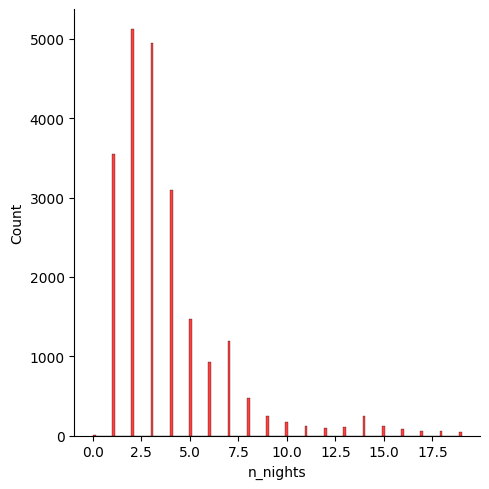

In [ ]:
#Distribution of n_nights of searches

#Percentage of dataset beyond 20 nights
print(len(searches[searches['n_nights'] > 20])/len(searches['n_nights'])*100, '% \n')

#Remove n_nights beyond 20 days
searches_within_twenty = searches[searches['n_nights'] < 20]

#Distribution plot of length_preperation column
sns.displot(searches_within_twenty, x='n_nights', color = 'red')
plt.show()

Removing n_nights beyond 20 days since only 7.3% of the dataset exists beyond 20 days.

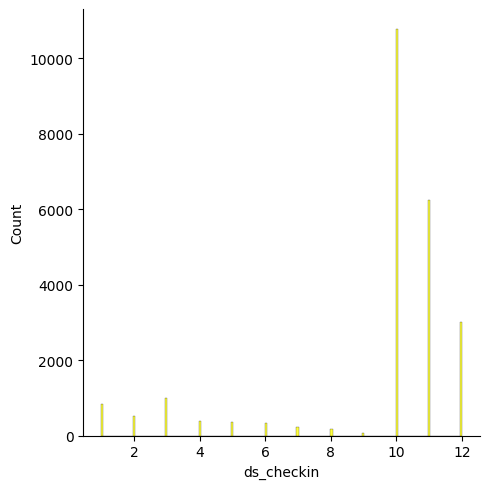

In [ ]:
#Distribution of months of ds_checkin of searches

checkin_month = pd.DatetimeIndex(searches['ds_checkin']).month

#Distribution plot of length_preperation column
sns.displot(checkin_month, color = 'yellow')
plt.show()


Used only the check-in month, cause checkout is usually within 5/6 days. The mean of n_nights after removing the upper outlier limit is 5.6, so assumed 5 or 6 days after the check-in date people usually checkout

In [ ]:
searches['filter_room_types'].unique()[0:15] #Display first 15 unique values

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

In [ ]:
def count_room_types(data, room_types):
    # Initialize a dictionary to hold counts for each room type
    room_type_counts = {room_type: 0 for room_type in room_types}

    # Iterate over each entry in the column
    for entry in data.dropna():  # Skip missing values
        # Normalize the entry to handle variations like capitalization
        normalized_entry = entry.lower()
        # Count occurrences of each room type
        for room_type in room_types:
            if room_type.lower() in normalized_entry:
                room_type_counts[room_type] += normalized_entry.count(room_type.lower())

    return room_type_counts



In [ ]:
recognized_room_types = ['Entire home', 'Private Room', 'Hotel Room', 'Shared Room']

# Apply the function to count occurrences of each room type
room_type_occurrences = count_room_types(searches['filter_room_types'], recognized_room_types)

print(room_type_occurrences)


{'Entire home': 12963, 'Private Room': 5964, 'Hotel Room': 0, 'Shared Room': 949}


In [ ]:
searches['filter_room_types'].unique()[0:15]

array(['Private room,Entire home/apt', nan, 'Entire home/apt',
       'Private room,Shared room',
       'Private room,Entire home/apt,Shared room', 'Private room',
       'Entire home/apt,Shared room', 'Shared room'], dtype=object)

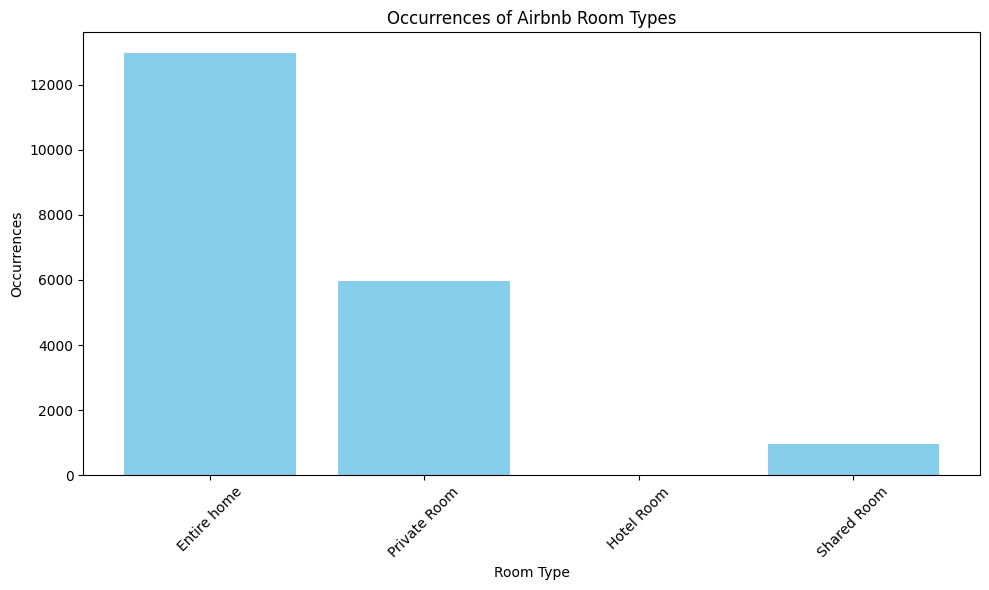

In [ ]:
room_types = list(room_type_occurrences.keys())
# Occurrences (y-axis)
occurrences = list(room_type_occurrences.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
plt.bar(room_types, occurrences, color='skyblue')

plt.title('Occurrences of Airbnb Room Types')
plt.xlabel('Room Type')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Display the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()

Find top 15 countries where searches originate from

Group by origin country and finding the count of each country

In [ ]:
search_origin = searches.groupby("origin_country").agg({'origin_country' : 'count'})
search_origin.columns = ['count']

search_origin = search_origin.sort_values('count', ascending = False) #Sort count in descending order
search_origin.nlargest(15, 'count') #Find the 15 largest values

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


#Merge Datasets

In [ ]:
merged_datasets = contacts.merge(searches, left_on='id_guest', right_on='id_user')

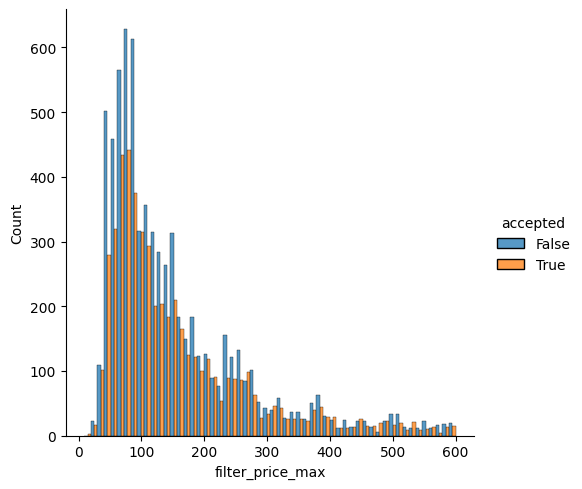

In [ ]:
#Check difference between prices searched between accepted/rejected applicants

merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

sns.displot(merged_pricemax_filter, x="filter_price_max", hue="accepted", multiple="dodge")
plt.show()

To further help better visualize the trend we set the filter price max as less or equal to 600. 600 was chosen as the limit since only 14.25% of the dataset has values greater than 600.

As seen, more people are rejected compared than accepted with an average acceptance rate of 43%

In [ ]:
#Classify dataset based on filter_price_max

def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'

    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'

    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'

    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'

    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'

    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'

    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby('classification_max_price').agg({'accepted': 'mean'})

,accepted
classification_max_price,
0-100,0.411160
100-200,0.430308
200-300,0.431149
300-400,0.450488
400-500,0.485549
500-600,0.422297
600+,0.433122


Based on this table, it can be seen that regardless of max_filter_price, people are rejected at similar rates

In [ ]:
dataset_country = merged_datasets[['origin_country', 'accepted']]

#Find acceptance count by country and accepted
accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

#Find acceptance count by country
country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

#Merge datasets for easier manipulation
acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted']) #Merge accepted count
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country']) #Merge total country count
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] #100 is used so there is a good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

#Divide count_accepted column by count_country column to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
72,AT,True,83,239,0.347280
54,RU,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729


In [ ]:
merged_datasets.dtypes

id_guest                             object
id_host                              object
id_listing                           object
ts_contact_at                datetime64[ns]
ts_reply_at                  datetime64[ns]
ts_accepted_at               datetime64[ns]
ts_booking_at                datetime64[ns]
ds_checkin_x                 datetime64[ns]
ds_checkout_x                datetime64[ns]
n_guests                              int64
n_messages                            int64
accepted                               bool
length_stay                 timedelta64[ns]
n_guests_transformed                float64
n_messages_transformed              float64
month_checkin                         int64
ds                           datetime64[ns]
id_user                              object
ds_checkin_y                 datetime64[ns]
ds_checkout_y                datetime64[ns]
n_searches                            int64
n_nights                            float64
n_guests_min                    

In [ ]:
merged_datasets['month_checkin'] = merged_datasets['ds_checkin_x'].dt.month
merged_datasets['weekday_checkin'] =merged_datasets['ds_checkin_x'].dt.weekday

In [51]:
df_holidays = pd.read_csv('fcal_Dublin_2023.csv', encoding='ISO-8859-1')

# Parsing 'Date' column in day.month.year format
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'], format='%d.%m.%Y')

# To display the DataFrame and check if it was read correctly
print(df_holidays.head())

        Date        Designation Day of the week Calendar week
0 2023-01-01     New Year´s Day             Sun       week 52
1 2023-03-17  St. Patrick's Day             Fri       week 11
2 2023-03-26          DST start             Sun       week 12
3 2023-04-07        Good Friday             Fri       week 14
4 2023-04-09             Easter             Sun       week 14


In [54]:
holiday_dates = set(df_holidays['Date'])

# Function to check if a date is a holiday
def is_holiday(check_in_date):
    return 1 if check_in_date in holiday_dates else 0

# Apply the function to create a new binary column 'is_holiday'
merged_datasets['is_holiday'] = merged_datasets['ds_checkin'].apply(is_holiday)

In [58]:
merged_datasets.dtypes

id_guest                             object
id_host                              object
id_listing                           object
ts_contact_at                datetime64[ns]
ts_reply_at                  datetime64[ns]
ts_accepted_at               datetime64[ns]
ts_booking_at                datetime64[ns]
ds_checkin_x                 datetime64[ns]
ds_checkout_x                datetime64[ns]
n_guests                              int64
n_messages                            int64
accepted                               bool
length_stay                 timedelta64[ns]
n_guests_transformed                float64
n_messages_transformed              float64
month_checkin                         int64
ds                           datetime64[ns]
id_user                              object
ds_checkin_y                 datetime64[ns]
ds_checkout_y                datetime64[ns]
n_searches                            int64
n_nights                            float64
n_guests_min                    

In [71]:
merged_datasets['booking_date'] = pd.to_datetime(merged_datasets['ts_booking_at']).dt.date
booking_counts = merged_datasets.groupby('booking_date').size().rename('n_bookings')

In [101]:
monthly_bookings = merged_datasets.groupby(merged_datasets['ts_booking_at'].dt.to_period('M'))['id_listing'].count()

# Convert the PeriodIndex to DateTimeIndex (the first day of each month)
monthly_bookings.index = monthly_bookings.index.to_timestamp()

In [110]:
booking_counts.index.max(),booking_counts.index.min()

(Timestamp('2015-01-21 00:00:00', freq='D'),
 Timestamp('2014-05-21 00:00:00', freq='D'))

In [80]:
split_date = booking_counts.index.max() - pd.Timedelta(days=60)
train = booking_counts.loc[booking_counts.index <= split_date]
test = booking_counts.loc[booking_counts.index > split_date]

In [89]:
train

2014-05-21    2
2014-05-22    0
2014-05-23    0
2014-05-24    0
2014-05-25    0
             ..
2014-11-18    4
2014-11-19    2
2014-11-20    6
2014-11-21    6
2014-11-22    0
Freq: D, Name: n_bookings, Length: 186, dtype: int64

In [82]:
test

2014-11-23     5
2014-11-24     4
2014-11-25     7
2014-11-26     2
2014-11-27     4
2014-11-28     2
2014-11-29     5
2014-11-30     9
2014-12-01    10
2014-12-02     0
2014-12-03     1
2014-12-04     4
2014-12-05     2
2014-12-06     1
2014-12-07     3
2014-12-08     3
2014-12-09     8
2014-12-10     2
2014-12-11     2
2014-12-12     0
2014-12-13     0
2014-12-14     0
2014-12-15     1
2014-12-16     2
2014-12-17     0
2014-12-18     1
2014-12-19     5
2014-12-20     0
2014-12-21     4
2014-12-22     8
2014-12-23     0
2014-12-24     0
2014-12-25     0
2014-12-26    13
2014-12-27     0
2014-12-28     0
2014-12-29     3
2014-12-30     0
2014-12-31     4
2015-01-01     2
2015-01-02     0
2015-01-03     8
2015-01-04     0
2015-01-05    16
2015-01-06     0
2015-01-07     5
2015-01-08     0
2015-01-09     2
2015-01-10     2
2015-01-11     0
2015-01-12     0
2015-01-13     3
2015-01-14     2
2015-01-15     8
2015-01-16     3
2015-01-17     0
2015-01-18     1
2015-01-19     0
2015-01-20    

In [106]:
from statsmodels.tsa.arima.model import ARIMA

# Initialize and fit the ARIMA model (you may need to adjust the order parameters)
arima_model = ARIMA(train, order=(1, 1, 1), seasonal_order=(1,1,1,12))
arima_results = arima_model.fit()

In [107]:
forecast = arima_results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean

In [108]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, forecast_mean)
rmse = mse ** 0.5
print(f'The Root Mean Squared Error of our forecasts is {rmse}')

The Root Mean Squared Error of our forecasts is 9.102045525101481


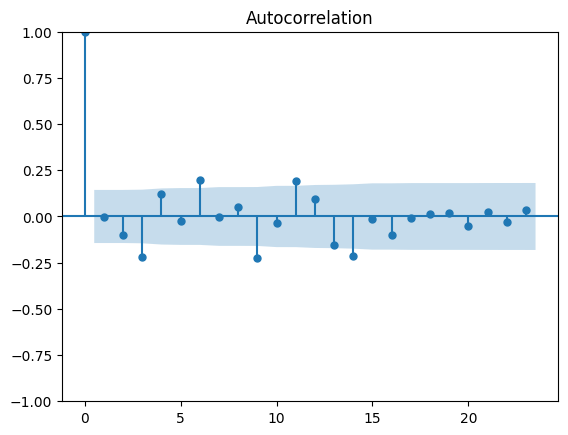

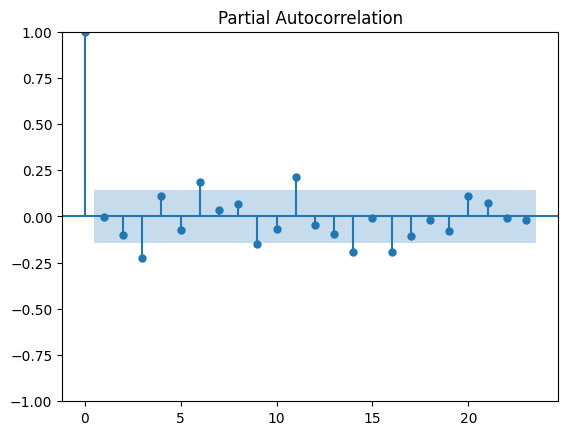

SignificanceResult(statistic=14530.793580057025, pvalue=0.0)


In [98]:
# After fitting your SARIMA model, you can access the residuals and conduct diagnostics
residuals = arima_results.resid

# Plot ACF and PACF for the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals)
plot_pacf(residuals)
plt.show()

# Run a statistical test to check for normality in residuals
from scipy import stats
print(stats.jarque_bera(residuals))


In [88]:
train.dtypes

dtype('int64')

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# SARIMA model with p, d, q as non-seasonal parameters and P, D, Q, s as seasonal parameters
sarima_model = SARIMAX(train,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 7),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()

# Print out the summary results of the fit
print(sarima_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        n_bookings   No. Observations:                  186
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -842.795
Date:                           Fri, 15 Mar 2024   AIC                           1695.590
Time:                                   22:52:08   BIC                           1711.239
Sample:                               05-21-2014   HQIC                          1701.940
                                    - 11-22-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0427      0.278     -0.154      0.878      -0.587       0.501
ma.L1          0.3009      0.266      1.130

In [96]:
# Forecast the next 30 days (or the length of your test set)
forecast = sarima_results.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean

# Calculate RMSE
mse = mean_squared_error(test, forecast_mean)
rmse = np.sqrt(mse)
print(f'The Root Mean Squared Error of our forecasts is {rmse}')


The Root Mean Squared Error of our forecasts is 6.907121320514905
